<a href="https://colab.research.google.com/github/dartwinshu/dibimbing-marketing-analysis-and-segmentation/blob/main/Dibimbing%20-%20Marketing%20Analysis%20and%20Segmentation%20-%20Part%2002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering: K-Means

Dalam proyek ini, Anda akan menganalisis kumpulan data yang berisi data tentang berbagai jumlah pengeluaran tahunan pelanggan (dilaporkan dalam unit moneter) dari berbagai kategori produk untuk struktur internal. Salah satu tujuan dari proyek ini adalah untuk mendeskripsikan variasi dalam berbagai jenis pelanggan yang berinteraksi dengan distributor grosir. Melakukan hal itu akan melengkapi distributor dengan wawasan tentang cara terbaik menyusun layanan pengiriman mereka untuk memenuhi kebutuhan setiap pelanggan.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from scipy.cluster.hierarchy import linkage,dendrogram

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Data Collection

In [3]:
data = pd.read_csv('marketplace_customers.csv')
data.sample(5)

,CustomerID,Age,Annual Spending (k$),Spending Score (1-100)
164,165,50,85,26
44,45,49,39,28
157,158,30,78,78
3,4,23,16,77
66,67,43,48,50


# Data Understanding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Spending (k$)    200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


# Data Preprocessing

## Check Null and Missing Values

In [5]:
data_null = data.isnull().sum().reset_index()
data_null.columns = ['feature','missing_value']
data_null['percentage'] = round((data_null['missing_value']/len(data))*100,2)
data_null = data_null.sort_values('percentage', ascending=False).reset_index(drop=True)
data_null = data_null[data_null['percentage']>0]
data_null

,feature,missing_value,percentage


## Duplicate Values

In [6]:
data.duplicated().sum()

0

## Statistical Summary

In [7]:
data.describe()

,CustomerID,Age,Annual Spending (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data = data.drop('CustomerID', axis=1)

## Numeric Distribution and oulier

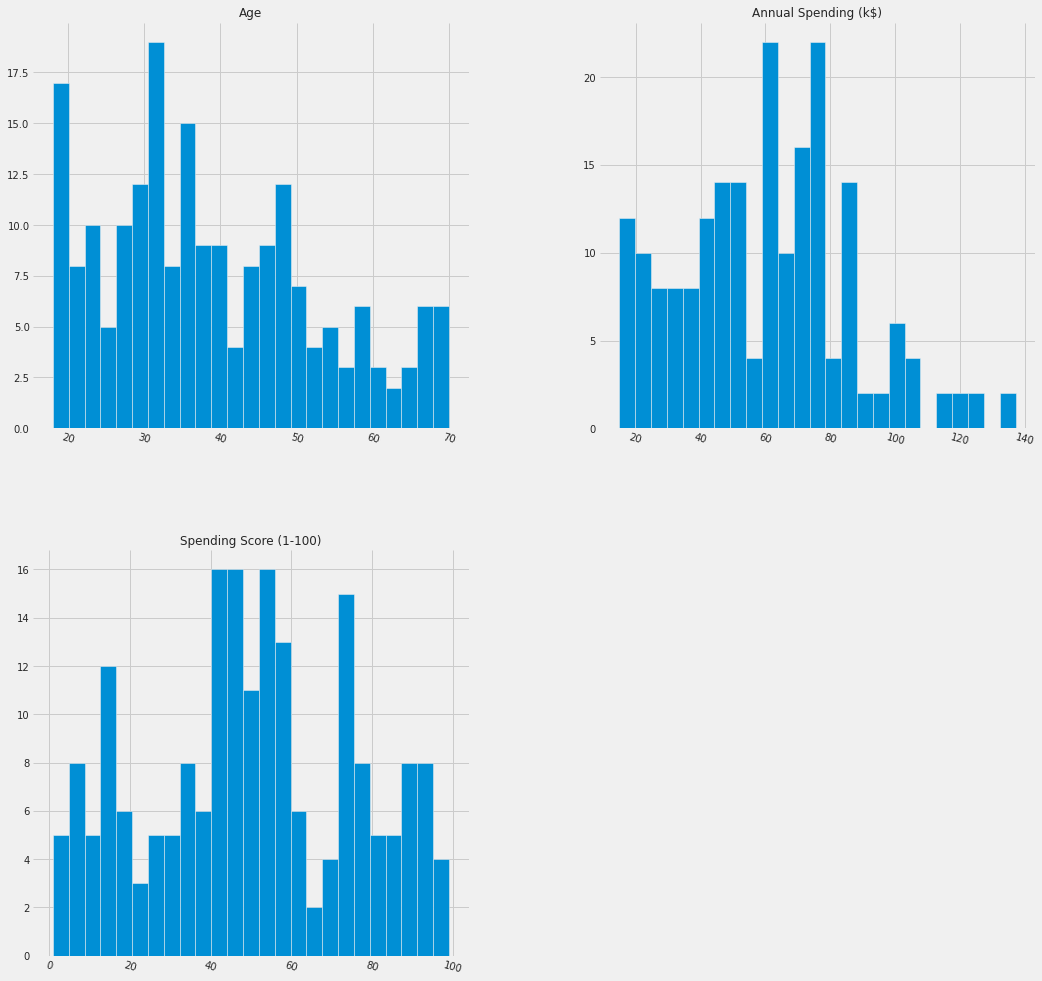

In [9]:
h = data.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

In [10]:
feat_num = list(data)

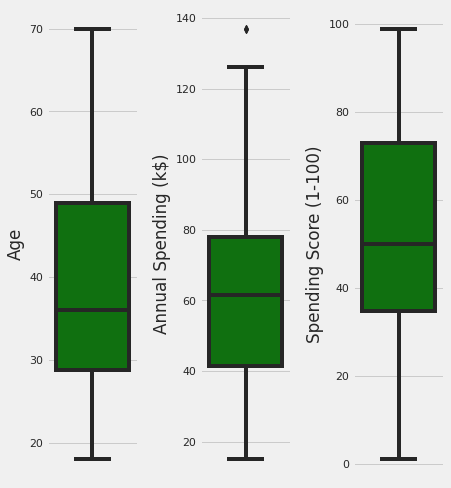

In [11]:
plt.figure(figsize=(15, 7))
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=data[feat_num[i]],color='green',orient='v')
    plt.tight_layout()
    

## Correlation Matrix

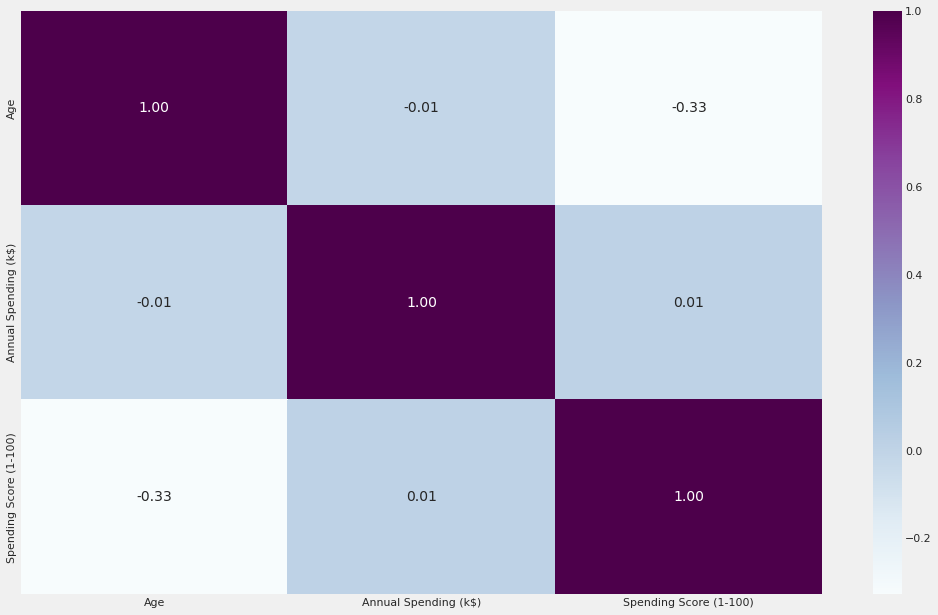

In [12]:
corr_= data.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

## Scaling

In [13]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(data.astype(float))

# Modeling

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [14]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_std)

In [15]:
df_data_std = pd.DataFrame(data=data_std, columns=list(data))

In [16]:
df_data_std['clusters'] = kmeans.labels_
data['clusters'] = kmeans.labels_

In [17]:
data.head(3)

,Age,Annual Spending (k$),Spending Score (1-100),clusters
0,19,15,39,1
1,21,15,81,1
2,20,16,6,1


# Evaluasi

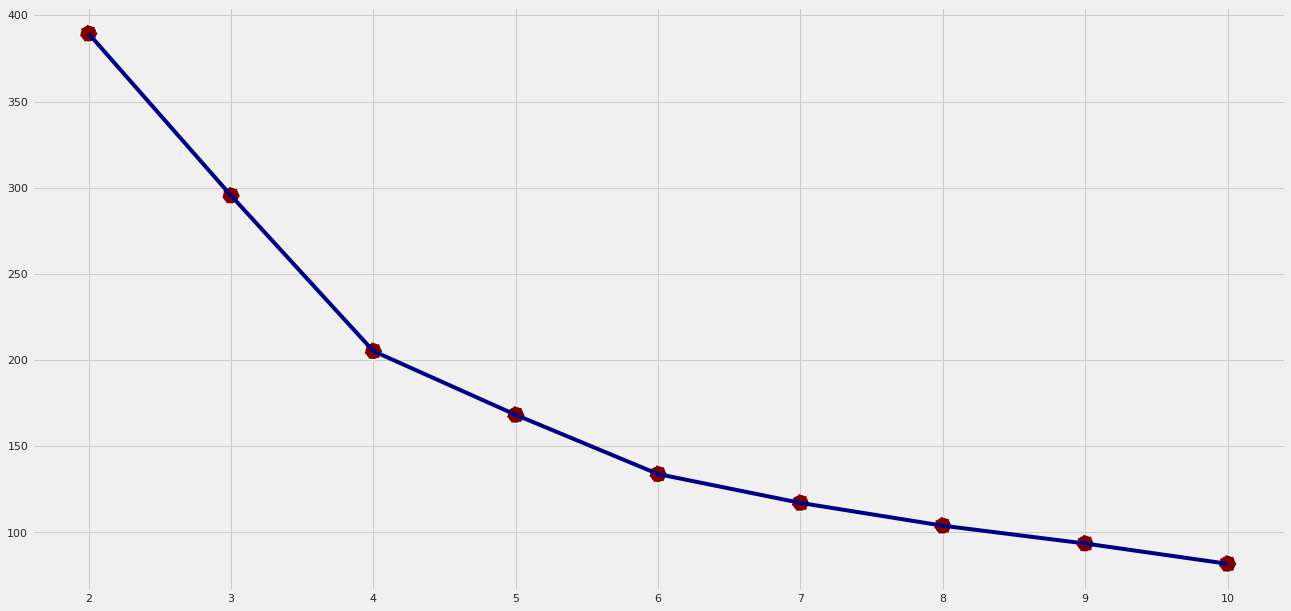

In [18]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


# Insight

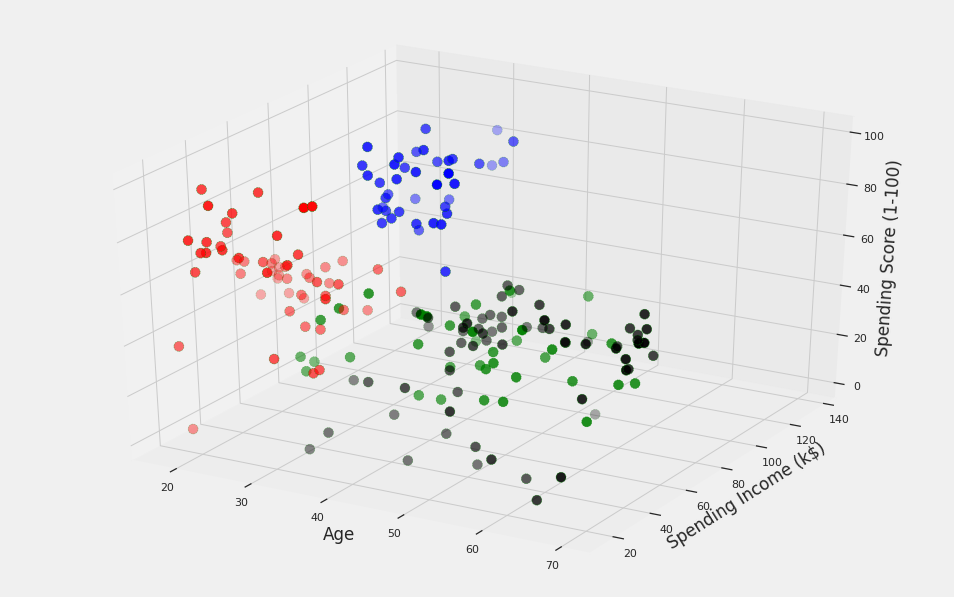

In [19]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.clusters == 0], data["Annual Spending (k$)"][data.clusters == 0], data["Spending Score (1-100)"][data.clusters == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.Age[data.clusters == 1], data["Annual Spending (k$)"][data.clusters == 1], data["Spending Score (1-100)"][data.clusters == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.Age[data.clusters == 2], data["Annual Spending (k$)"][data.clusters == 2], data["Spending Score (1-100)"][data.clusters == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(data.Age[data.clusters == 3], data["Annual Spending (k$)"][data.clusters == 3], data["Spending Score (1-100)"][data.clusters == 3], c='black', s=100, edgecolor='green',linestyle='--')


plt.xlabel("Age")
plt.ylabel("Spending Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [20]:
data.groupby('clusters').mean()

,Age,Annual Spending (k$),Spending Score (1-100)
clusters,,,
0,32.875000,86.100000,81.525000
1,25.438596,40.000000,60.298246
2,39.368421,86.500000,19.578947
3,53.984615,47.707692,39.969231


**Karena sulit melihat hasil clustering pada visualisasi 3d maka kita akan visualisasi 2d menggunakan PCA**

In [21]:
pca = PCA(n_components=2)

pca.fit(data_std)
pcs = pca.transform(data_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,-0.615720,-1.763481,1
1,-1.665793,-1.820747,1
2,0.337862,-1.674799,1
3,-1.456573,-1.772430,1
4,-0.038465,-1.662740,1


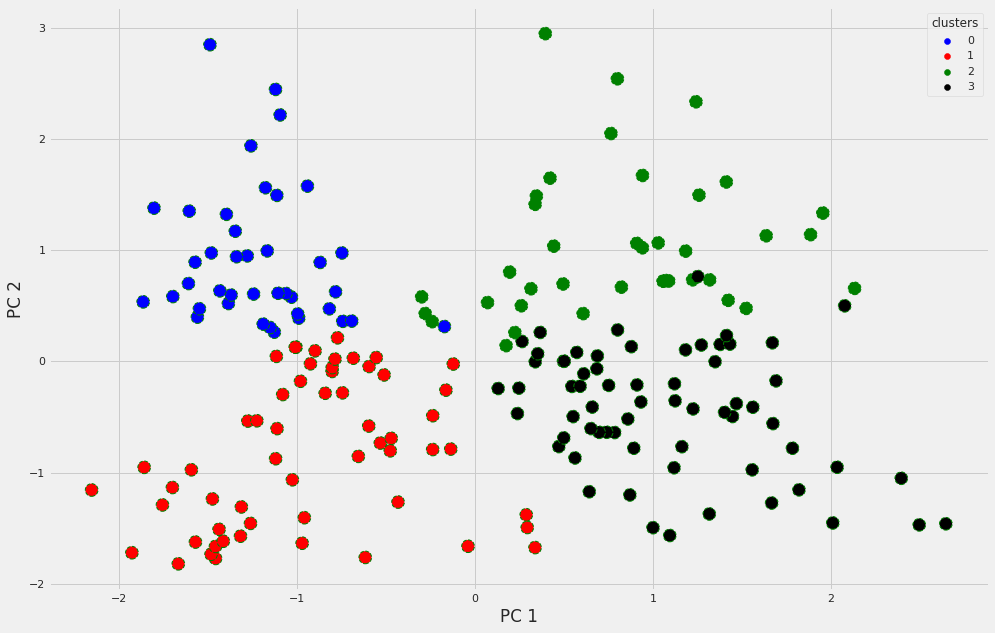

In [22]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','black'],
    s=160,
    ax=ax
)

In [23]:
display(data.groupby('clusters').agg(['mean','median']))

Age        Annual Spending (k$)        Spending Score (1-100)  \
               mean median                 mean median                   mean   
clusters                                                                        
0         32.875000   32.0            86.100000   78.5              81.525000   
1         25.438596   24.0            40.000000   40.0              60.298246   
2         39.368421   40.5            86.500000   79.5              19.578947   
3         53.984615   52.0            47.707692   49.0              39.969231   

                 
         median  
clusters         
0          83.0  
1          56.0  
2          17.0  
3          46.0